In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


**K Nearest Neighbors Project**

Welcome to my KNN project! It's an implementation of the KNN method by using SkLearn.

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Get the Data**

In [3]:
breast_cancer = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Add a new diagnosis class column**

In [4]:
def diag(value):
    if value == "M":
        return 1
    else:
        return 0
breast_cancer["diagnosis_class"] = breast_cancer["diagnosis"].apply(diag)
del breast_cancer["diagnosis"]
breast_cancer.head()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_class
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


**Standardize the Variables**

In [5]:
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
scaler = StandardScaler()

In [7]:
X = breast_cancer.drop("diagnosis_class",axis=1)
y = breast_cancer["diagnosis_class"]

fit_scaler = scaler.fit(breast_cancer.drop("diagnosis_class",axis=1))

In [8]:
tr_fit_scaler = fit_scaler.transform(breast_cancer.drop("diagnosis_class",axis=1))

**Train Test Split**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

**Using KNN**

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

**Time for prediction and evalutation**

In [14]:
pred = knn.predict(X_test)

**evalutation**

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       117
           1       0.77      0.51      0.61        71

    accuracy                           0.76       188
   macro avg       0.76      0.71      0.72       188
weighted avg       0.76      0.76      0.74       188



In [17]:
print(confusion_matrix(y_test,pred))

[[106  11]
 [ 35  36]]


**Find the best possible K value**

In [18]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    


**Plot K values**

Text(0, 0.5, 'Error Rate')

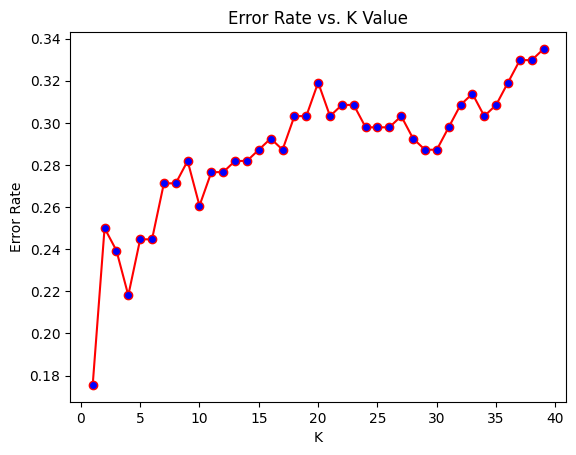

In [19]:
plt.plot(range(1,40),error_rate,marker="o",c="r",markerfacecolor="b")
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Retrain with new K value**

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       117
           1       0.81      0.70      0.75        71

    accuracy                           0.82       188
   macro avg       0.82      0.80      0.81       188
weighted avg       0.82      0.82      0.82       188



In [22]:
print(confusion_matrix(y_test,pred))

[[105  12]
 [ 21  50]]
